In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


####Colocando os Dados em uma Data Frame

In [3]:
data = pd.read_csv("Downloads/CCARDBALANCECSV.csv")
data.head(7)

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,"14,891",3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,"106,025",6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,"104,593",7075,514,4,71,11,Male,No,No,Asian,580
3,4,"148,924",9504,681,3,36,11,Female,No,No,Asian,964
4,5,"55,882",4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,"80,18",8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,"20,996",3388,259,2,37,12,Female,No,No,African American,203


####Pegar o numero de Gasto Mensal

In [11]:
data.shape

(400, 12)

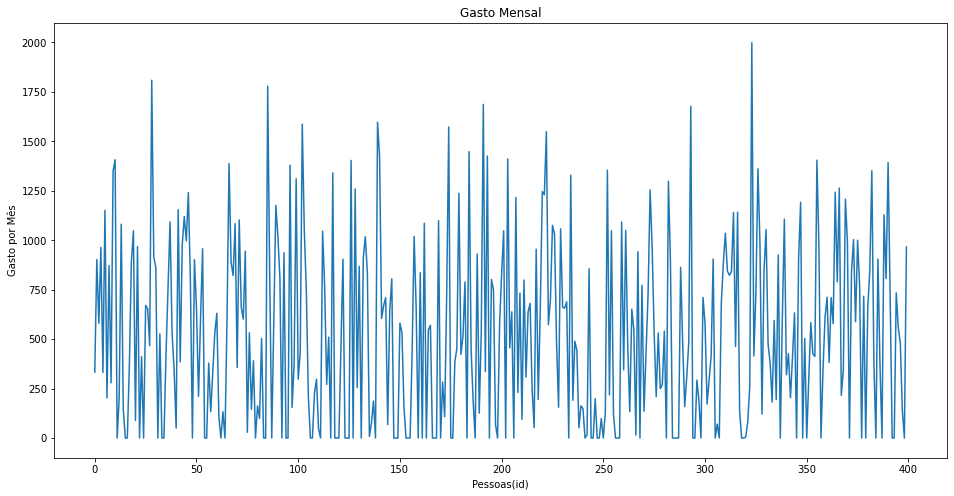

In [22]:
plt.figure(figsize=(16,8))
plt.title('Gasto Mensal')
plt.xlabel('Pessoas(ID)')
plt.ylabel('Gasto por Mês')
plt.plot(data['Gasto Mensal'])
plt.show()

####Pegar o Gasto Mensal

In [15]:
data = data [['Gasto Mensal']]
data.head (5)

,Gasto Mensal
0,333
1,903
2,580
3,964
4,331


####Criar Variaveis para os mêses futuros

In [18]:
future_month = 12

####Criar coluna Alvo

In [25]:
data['Prediction'] = data [['Gasto Mensal']].shift(-future_month)
data.head(5)

,Gasto Mensal,Prediction
0,333,204.0
1,903,1081.0
2,580,148.0
3,964,0.0
4,331,0.0


In [24]:
X = np.array(data.drop(['Prediction'], 1))[:-future_month]
print(X)

[[ 333]
 [ 903]
 [ 580]
 [ 964]
 [ 331]
 [1151]
 [ 203]
 [ 872]
 [ 279]
 [1350]
 [1407]
 [   0]
 [ 204]
 [1081]
 [ 148]
 [   0]
 [   0]
 [ 368]
 [ 891]
 [1048]
 [  89]
 [ 968]
 [   0]
 [ 411]
 [   0]
 [ 671]
 [ 654]
 [ 467]
 [1809]
 [ 915]
 [ 863]
 [   0]
 [ 526]
 [   0]
 [   0]
 [ 419]
 [ 762]
 [1093]
 [ 531]
 [ 344]
 [  50]
 [1155]
 [ 385]
 [ 976]
 [1120]
 [ 997]
 [1241]
 [ 797]
 [   0]
 [ 902]
 [ 654]
 [ 211]
 [ 607]
 [ 957]
 [   0]
 [   0]
 [ 379]
 [ 133]
 [ 333]
 [ 531]
 [ 631]
 [ 108]
 [   0]
 [ 133]
 [   0]
 [ 602]
 [1388]
 [ 889]
 [ 822]
 [1084]
 [ 357]
 [1103]
 [ 663]
 [ 601]
 [ 945]
 [  29]
 [ 532]
 [ 145]
 [ 391]
 [   0]
 [ 162]
 [  99]
 [ 503]
 [   0]
 [   0]
 [1779]
 [ 815]
 [   0]
 [ 579]
 [1176]
 [1023]
 [ 812]
 [   0]
 [ 937]
 [   0]
 [   0]
 [1380]
 [ 155]
 [ 375]
 [1311]
 [ 298]
 [ 431]
 [1587]
 [1050]
 [ 745]
 [ 210]
 [   0]
 [   0]
 [ 227]
 [ 297]
 [  47]
 [   0]
 [1046]
 [ 768]
 [ 271]
 [ 510]
 [   0]
 [1341]
 [   0]
 [   0]
 [   0]
 [ 454]
 [ 904]
 [   0]
 [   0]


In [27]:
y = np.array(data['Prediction'])[:-future_month]
print(y)

[ 204. 1081.  148.    0.    0.  368.  891. 1048.   89.  968.    0.  411.
    0.  671.  654.  467. 1809.  915.  863.    0.  526.    0.    0.  419.
  762. 1093.  531.  344.   50. 1155.  385.  976. 1120.  997. 1241.  797.
    0.  902.  654.  211.  607.  957.    0.    0.  379.  133.  333.  531.
  631.  108.    0.  133.    0.  602. 1388.  889.  822. 1084.  357. 1103.
  663.  601.  945.   29.  532.  145.  391.    0.  162.   99.  503.    0.
    0. 1779.  815.    0.  579. 1176. 1023.  812.    0.  937.    0.    0.
 1380.  155.  375. 1311.  298.  431. 1587. 1050.  745.  210.    0.    0.
  227.  297.   47.    0. 1046.  768.  271.  510.    0. 1341.    0.    0.
    0.  454.  904.    0.    0.    0. 1404.    0. 1259.  255.  868.    0.
  912. 1018.  835.    8.   75.  187.    0. 1597. 1425.  605.  669.  710.
   68.  642.  805.    0.    0.    0.  581.  534.  156.    0.    0.    0.
  429. 1020.  653.    0.  836.    0. 1086.    0.  548.  570.    0.    0.
    0. 1099.    0.  283.  108.  724. 1573.    0.   

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [38]:
x_future = data.drop(['Prediction'], 1)[:-future_month]
x_future = x_future.tail(future_month)
x_future = np.array(x_future)
x_future

array([[ 767],
       [   0],
       [ 717],
       [   0],
       [ 661],
       [ 849],
       [1352],
       [ 382],
       [   0],
       [ 905],
       [ 371],
       [   0]], dtype=int64)

In [42]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1129.          538.26984127  844.          538.26984127   16.
    0.          734.         1003.          538.26984127  640.
    0.          538.26984127]

[495.02423664 538.09895437 497.83223649 538.09895437 500.97719632
 490.41911688 462.17063836 516.6458355  538.09895437 487.27415704
 517.26359547 538.09895437]


<ipython-input-45-4c541dcd5cbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


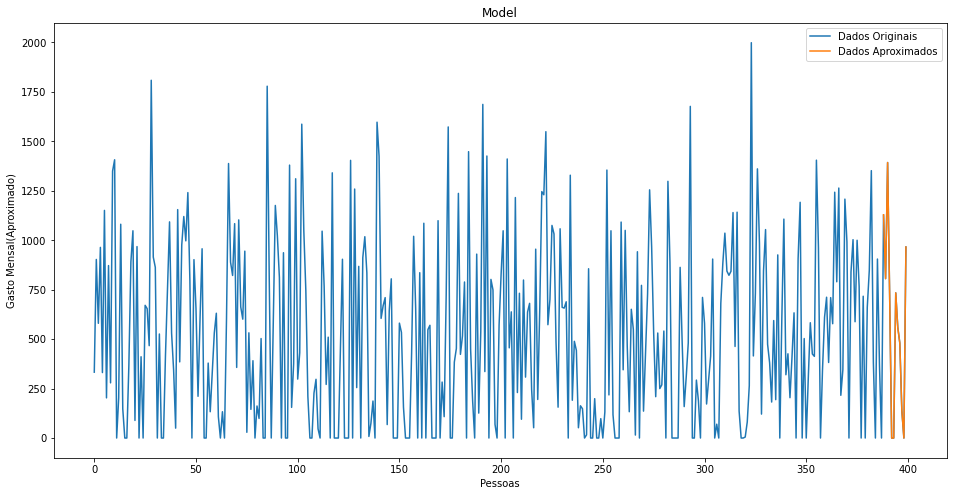

In [45]:
predictions = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Pessoas')
plt.ylabel('Gasto Mensal(Aproximado)')
plt.plot(data['Gasto Mensal'])
plt.plot(valid[['Gasto Mensal', 'Prediction']])
plt.legend(['Dados Originais', 'Dados Aproximados'])
plt.show()

<ipython-input-46-166e34f3e4b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


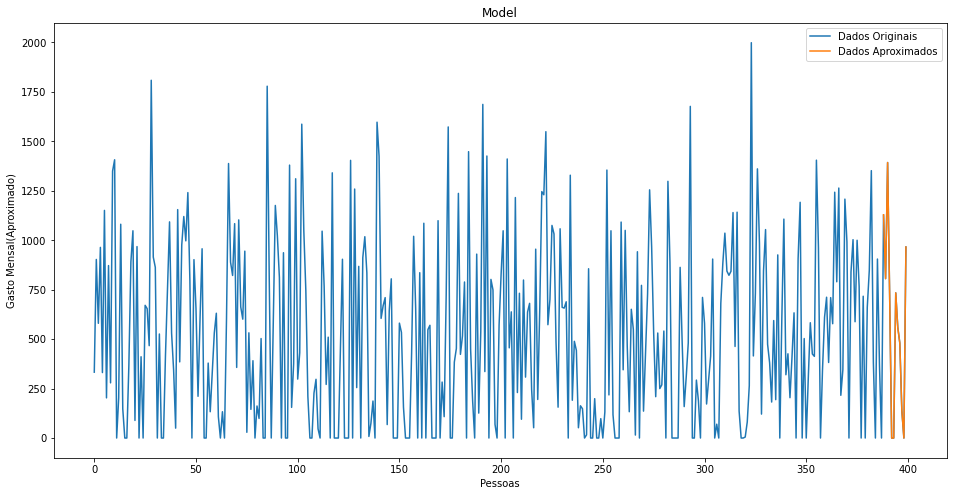

In [46]:
predictions = lr_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Pessoas')
plt.ylabel('Gasto Mensal(Aproximado)')
plt.plot(data['Gasto Mensal'])
plt.plot(valid[['Gasto Mensal', 'Prediction']])
plt.legend(['Dados Originais', 'Dados Aproximados'])
plt.show()

In [48]:
predictions.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'